In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("loan.csv")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [6]:
df = data
# Creating a copy of data for future references

In [7]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In this data multiple null values are there

In [8]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [9]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [11]:
cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Term',
       'Credit_History']

# Created a list of columns to see weather they have normalized data or not, if data is normal then
# we will fill the na values with some other values

In [19]:
for i in cols:
    d = df[i].value_counts()
    print(d)
    print("-----------------------------------------")

Gender
Male      502
Female    112
Name: count, dtype: int64
-----------------------------------------
Married
Yes    401
No     213
Name: count, dtype: int64
-----------------------------------------
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
-----------------------------------------
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
-----------------------------------------
Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
-----------------------------------------
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
-----------------------------------------


In [24]:
d = df["Gender"].value_counts()
print(d, type(d))
print(d.index)
print(d.index[0])

Gender
Male      502
Female    112
Name: count, dtype: int64 <class 'pandas.core.series.Series'>
Index(['Male', 'Female'], dtype='object', name='Gender')
Male


In [17]:
# df["Gender"] = df["Gender"].fillna("Male")
for i in cols:
    d = df[i].value_counts()
    # finding the values count of every column
    df[i] = df[i].fillna(d.index[0])
    # filling the blank/null by the first/max values index 

In [18]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [25]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [30]:
new_dependants = []
for i in df["Dependents"]:
    if i == "3+":
        new_dependants.append("3")
    else:
        new_dependants.append(i)

In [31]:
new_dependants

['0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '3',
 '2',
 '1',
 '2',
 '2',
 '2',
 '0',
 '2',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '2',
 '1',
 '0',
 '0',
 '2',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '1',
 '2',
 '0',
 '0',
 '1',
 '2',
 '0',
 '3',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '3',
 '0',
 '0',
 '2',
 '0',
 '3',
 '3',
 '0',
 '0',
 '1',
 '3',
 '3',
 '0',
 '1',
 '2',
 '0',
 '1',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '2',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '2',
 '3',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '3',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '0',
 '2',
 '0',
 '2',
 '2',
 '0',
 '0',
 '0',
 '2',
 '0',
 '2',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '3',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0'

In [32]:
df["Dependents"] = new_dependants

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [38]:
cols_2 = ["Dependents", "Coapplicant_Income", "Term", "Credit_History"]

In [41]:
for i in cols_2:
    df[i] = df[i].astype("int64")

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0,15000000,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800,12800000,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0,6600000,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800,12000000,360,1,Urban,Y
4,Male,No,0,Graduate,No,600000,0,14100000,360,1,Urban,Y


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              614 non-null    object
 1   Married             614 non-null    object
 2   Dependents          614 non-null    int64 
 3   Education           614 non-null    object
 4   Self_Employed       614 non-null    object
 5   Applicant_Income    614 non-null    int64 
 6   Coapplicant_Income  614 non-null    int64 
 7   Loan_Amount         614 non-null    int64 
 8   Term                614 non-null    int64 
 9   Credit_History      614 non-null    int64 
 10  Area                614 non-null    object
 11  Status              614 non-null    object
dtypes: int64(6), object(6)
memory usage: 57.7+ KB


In [44]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [69]:
obj_cols = ['Married', 'Education', 'Self_Employed', 'Area', 'Status']

num_cols = ['Dependents', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 'Credit_History']

In [46]:
df[num_cols].describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000
mean,0.744300,5.403459e+05,1.621246e+05,1.414104e+07,342.410423,0.855049
std,1.009623,6.109042e+05,2.926248e+05,8.815682e+06,64.428629,0.352339
min,0.000000,1.500000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000
25%,0.000000,2.877500e+05,0.000000e+00,9.800000e+06,360.000000,1.000000
50%,0.000000,3.812500e+05,1.188500e+05,1.250000e+07,360.000000,1.000000
75%,1.000000,5.795000e+05,2.297250e+05,1.647500e+07,360.000000,1.000000
max,3.000000,8.100000e+06,4.166700e+06,7.000000e+07,480.000000,1.000000


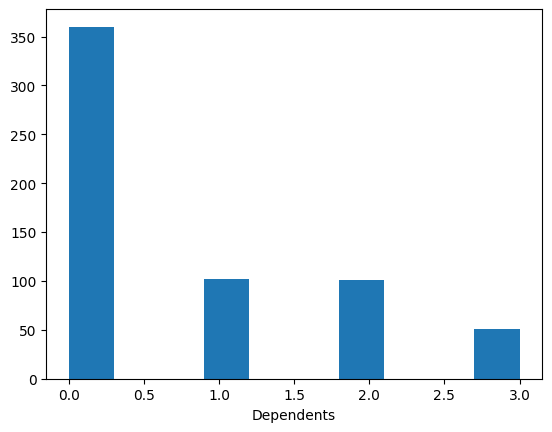

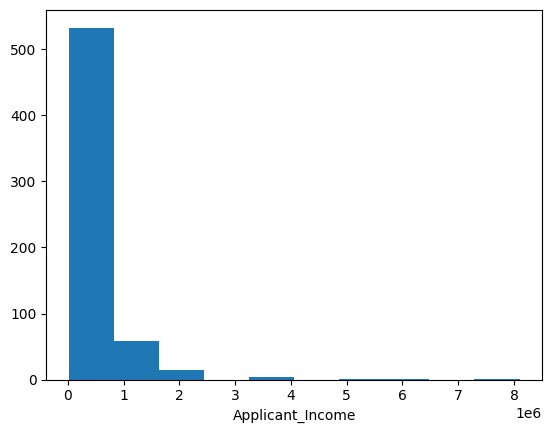

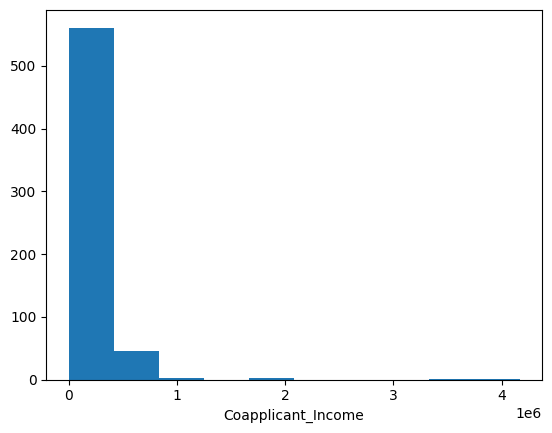

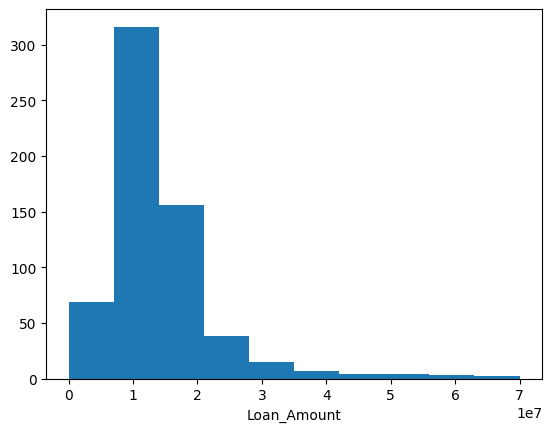

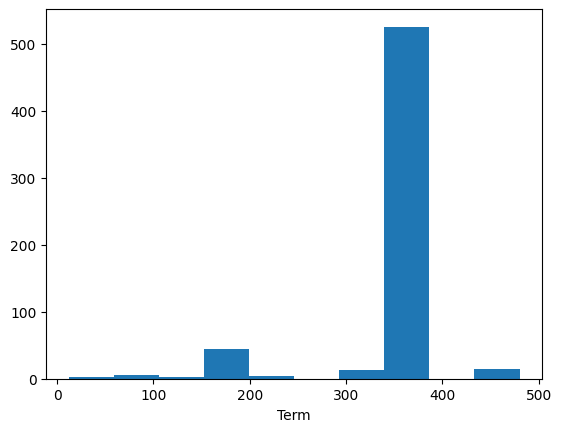

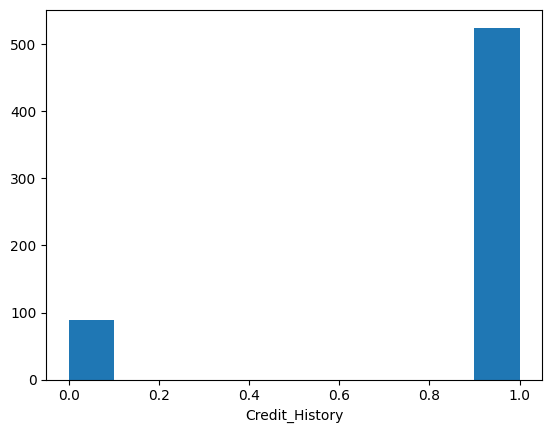

In [48]:
for i in num_cols:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

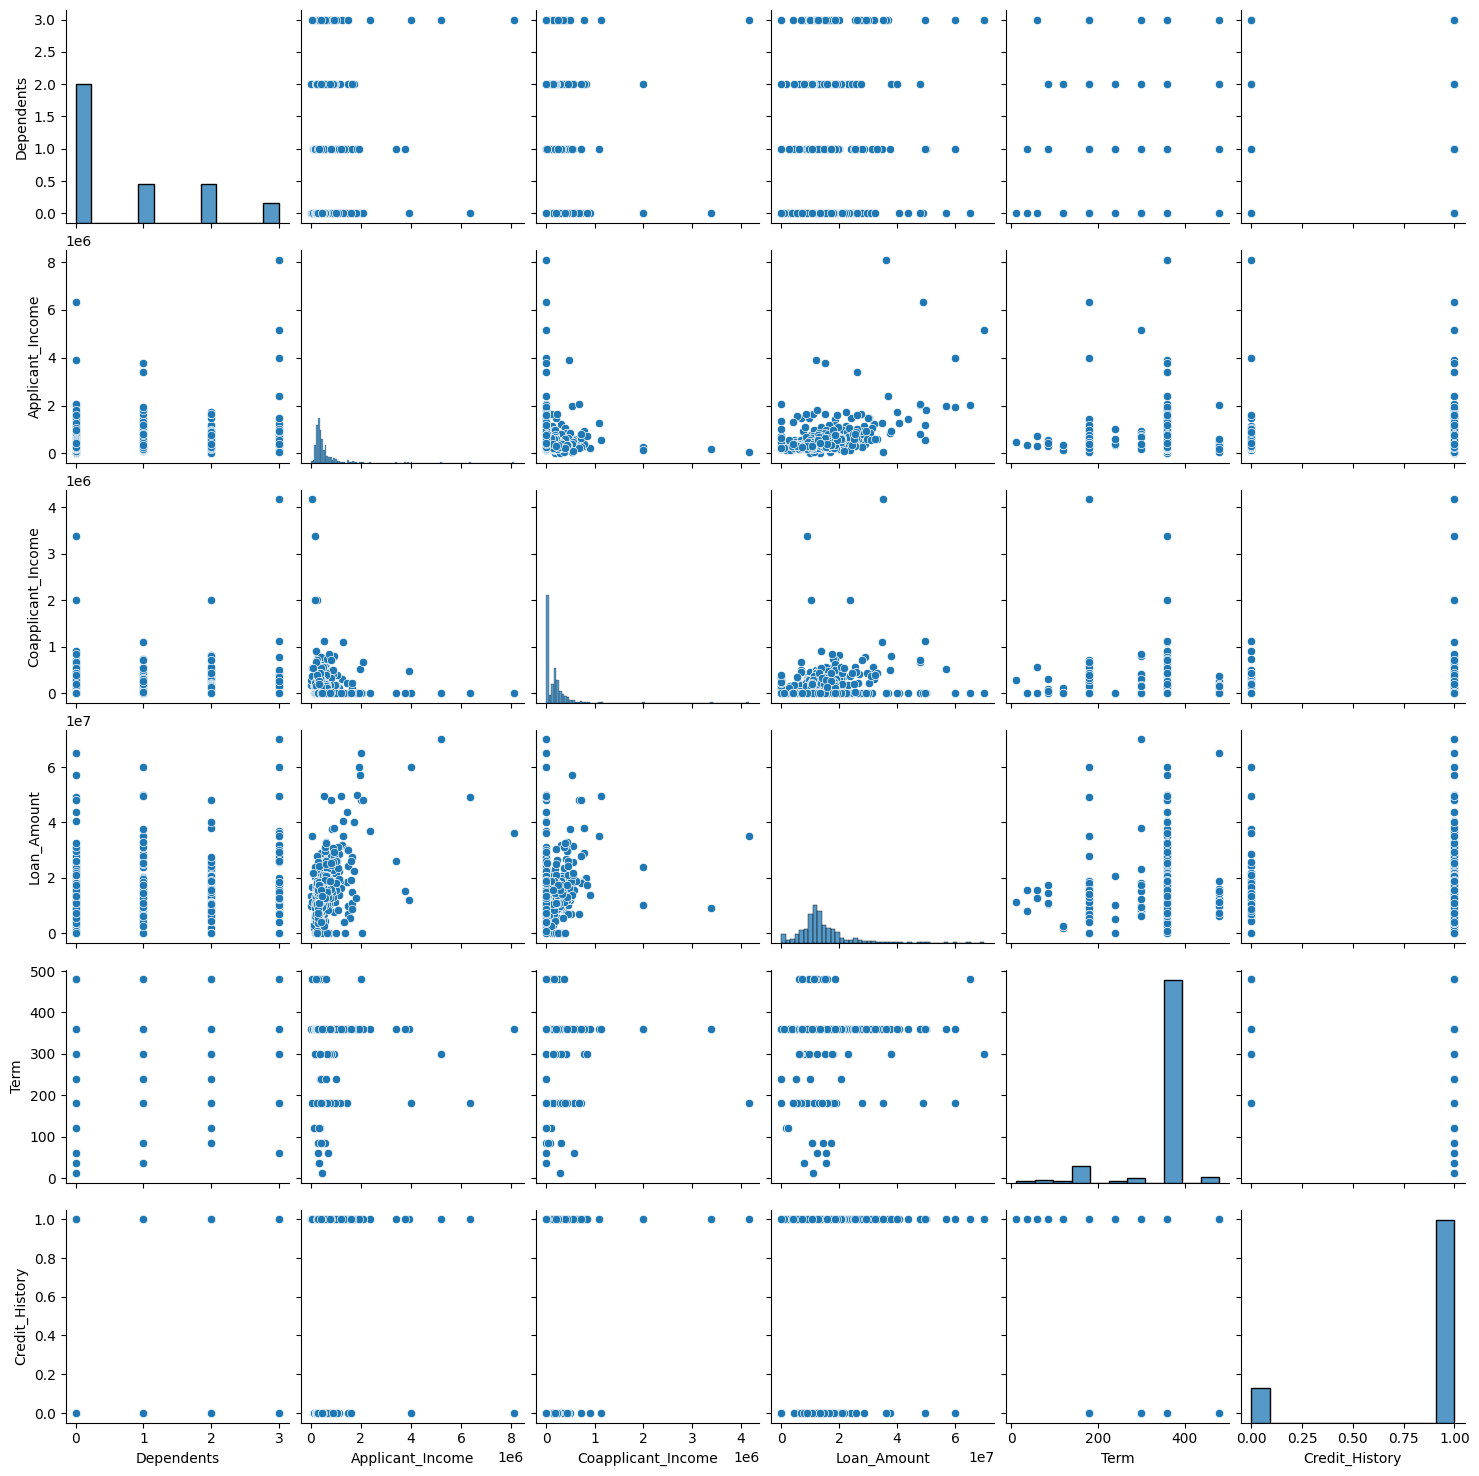

In [55]:
sns.pairplot(df[num_cols])
plt.show()

In [68]:
df.head()

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,Gender_Male
0,No,0,Graduate,No,584900,0,15000000,360,1,Urban,Y,1
1,Yes,1,Graduate,No,458300,150800,12800000,360,1,Rural,N,1
2,Yes,0,Graduate,Yes,300000,0,6600000,360,1,Urban,Y,1
3,Yes,0,Not Graduate,No,258300,235800,12000000,360,1,Urban,Y,1
4,No,0,Graduate,No,600000,0,14100000,360,1,Urban,Y,1


In [72]:
for i in obj_cols:
    df=pd.get_dummies(df, columns = [i],dtype = "int64", drop_first = True)

In [73]:
df.head()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Area_Semiurban,Area_Urban,Status_Y
0,0,584900,0,15000000,360,1,1,0,0,0,0,1,1
1,1,458300,150800,12800000,360,1,1,1,0,0,0,0,0
2,0,300000,0,6600000,360,1,1,1,0,1,0,1,1
3,0,258300,235800,12000000,360,1,1,1,1,0,0,1,1
4,0,600000,0,14100000,360,1,1,0,0,0,0,1,1


In [75]:
X = df.drop("Status_Y", axis = 1)
y = df["Status_Y"]

In [74]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=125)

In [90]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [78]:
model = MultinomialNB()

In [79]:
model.fit(X_train, y_train)

MultinomialNB()

In [83]:
y_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
confusion_matrix(y_test, y_pred)

array([[21, 27],
       [39, 36]], dtype=int64)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.44      0.39        48
           1       0.57      0.48      0.52        75

    accuracy                           0.46       123
   macro avg       0.46      0.46      0.46       123
weighted avg       0.49      0.46      0.47       123



In [88]:
X_train.head()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Area_Semiurban,Area_Urban
123,2,295700,0,8100000,360,1,1,1,0,0,1,0
560,2,367500,24200,10800000,360,1,1,1,1,0,1,0
82,2,137800,188100,16700000,360,1,0,1,0,0,0,1
139,2,420000,143000,12900000,360,1,1,1,1,0,0,0
506,0,2083300,666700,48000000,360,1,1,1,0,0,0,1


In [89]:
y_train.head()

123    1
560    1
82     0
139    0
506    1
Name: Status_Y, dtype: int64

In [91]:
model_2 = BernoulliNB() 

In [92]:
model_2.fit(X_train, y_train)

BernoulliNB()

In [94]:
y_pred2 = model_2.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.40      0.54        48
           1       0.71      0.96      0.82        75

    accuracy                           0.74       123
   macro avg       0.79      0.68      0.68       123
weighted avg       0.77      0.74      0.71       123



In [98]:
confusion_matrix(y_test, y_pred2)

array([[19, 29],
       [ 3, 72]], dtype=int64)